In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/KennedyRMenezes/DataScience/refs/heads/master/Estudos/Alura/Classifica%C3%A7%C3%A3o/8.modelos-semi-supervisionados/qualidade_leite.csv")

In [3]:
dados

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor,Qualidade
0,6.6,35,1,0,1,0,254,alta
1,6.6,36,0,1,0,1,253,alta
2,8.5,70,1,1,1,1,246,NaN
3,9.5,34,1,1,0,1,255,NaN
4,6.6,37,0,0,0,0,255,média
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,NaN
1055,6.7,38,1,0,1,0,255,NaN
1056,3.0,40,1,1,1,1,255,NaN
1057,6.8,43,1,0,1,0,250,NaN


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           1059 non-null   float64
 1   Temperatura  1059 non-null   int64  
 2   Sabor        1059 non-null   int64  
 3   Odor         1059 non-null   int64  
 4   Gordura      1059 non-null   int64  
 5   Turbidez     1059 non-null   int64  
 6   Cor          1059 non-null   int64  
 7   Qualidade    424 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [5]:
dados['Qualidade'].value_counts(dropna=False)

,count
Qualidade,
NaN,635
baixa,184
média,149
alta,91


In [6]:
dados.describe()

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


Como construir um modelo de classiicação se a maioria dos dados são nulos?

In [7]:
dados_rotulados = dados.dropna()

In [8]:
dados_rotulados

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor,Qualidade
0,6.6,35,1,0,1,0,254,alta
1,6.6,36,0,1,0,1,253,alta
4,6.6,37,0,0,0,0,255,média
6,5.5,45,1,0,1,1,250,baixa
7,4.5,60,0,1,1,1,250,baixa
...,...,...,...,...,...,...,...,...
1047,6.8,45,1,1,1,0,245,alta
1048,9.5,34,1,1,0,1,255,baixa
1049,6.5,37,0,0,0,0,255,média
1052,6.5,40,1,0,0,0,250,média


In [9]:
X = dados_rotulados.drop('Qualidade', axis=1)
y = dados_rotulados['Qualidade']

In [10]:
dados_rotulados['Qualidade'].value_counts(dropna=False)

,count
Qualidade,
baixa,184
média,149
alta,91


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [13]:
y

array([0, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0,
       2, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1,
       1, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1,
       2, 1, 1, 2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 0, 1, 1,
       0, 2, 1, 1, 2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2,
       0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 2, 0, 1,
       1, 1, 1, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 1, 2,
       0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0,
       1, 2, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2,
       0, 1, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2,
       0, 2, 1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2, 2, 0,

In [14]:
label_encoder.inverse_transform([0,1,2])

array(['alta', 'baixa', 'média'], dtype=object)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
x_normalizado = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
x_normalizado

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
0,0.553846,0.017857,1.0,0.0,1.0,0.0,0.933333
1,0.553846,0.035714,0.0,1.0,0.0,1.0,0.866667
2,0.553846,0.053571,0.0,0.0,0.0,0.0,1.000000
3,0.384615,0.196429,1.0,0.0,1.0,1.0,0.666667
4,0.230769,0.464286,0.0,1.0,1.0,1.0,0.666667
...,...,...,...,...,...,...,...
419,0.584615,0.196429,1.0,1.0,1.0,0.0,0.333333
420,1.000000,0.000000,1.0,1.0,0.0,1.0,1.000000
421,0.538462,0.053571,0.0,0.0,0.0,0.0,1.000000
422,0.538462,0.107143,1.0,0.0,0.0,0.0,0.666667


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_treino, X_teste, y_treino, y_teste = train_test_split(x_normalizado, y, stratify=y, random_state=10)

In [19]:
from sklearn.svm import SVC

In [20]:
svm = SVC(kernel='linear', random_state=10)
svm.fit(X_treino, y_treino)

SVC(kernel='linear', random_state=10)

In [21]:
from sklearn.metrics import classification_report

In [22]:
pred = svm.predict(X_teste)
resultados_svm = classification_report(y_teste, pred)
print(resultados_svm)

              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.67      0.91      0.77        46
           2       0.90      0.76      0.82        37

    accuracy                           0.75       106
   macro avg       0.77      0.69      0.70       106
weighted avg       0.77      0.75      0.73       106



Abordagem semi-supervisionado para usar os dados que não estão rotulados da coluna 'Qualidade'

In [23]:
dados[dados['Qualidade'].isna()]

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor,Qualidade
2,8.5,70,1,1,1,1,246,NaN
3,9.5,34,1,1,0,1,255,NaN
5,6.6,37,1,1,1,1,255,NaN
8,8.1,66,1,0,1,1,255,NaN
10,6.7,45,1,1,1,0,245,NaN
...,...,...,...,...,...,...,...,...
1053,8.1,66,1,0,1,1,255,NaN
1054,6.7,45,1,1,0,0,247,NaN
1055,6.7,38,1,0,1,0,255,NaN
1056,3.0,40,1,1,1,1,255,NaN


In [24]:
dados_sem_rotulos = dados[dados['Qualidade'].isna()].drop('Qualidade', axis=1)

In [25]:
dados_sem_rotulo_normalizados = pd.DataFrame(scaler.transform(dados_sem_rotulos), columns=dados_sem_rotulos.columns)

In [26]:
y_previsto = svm.predict(dados_sem_rotulo_normalizados)

In [27]:
y_previsto

array([1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1,
       2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1,
       2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1,
       2, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0,

Pseudo Labeling - Pseudo Rótulos

In [28]:
novo_x_treino = pd.concat([X_treino, dados_sem_rotulo_normalizados], ignore_index=True)
novo_x_treino

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
0,0.584615,0.017857,1.0,0.0,1.0,0.0,0.400000
1,0.538462,0.035714,0.0,0.0,0.0,0.0,0.466667
2,0.538462,0.017857,1.0,0.0,1.0,0.0,0.400000
3,0.569231,0.071429,1.0,0.0,1.0,0.0,1.000000
4,0.553846,0.196429,0.0,1.0,1.0,1.0,0.666667
...,...,...,...,...,...,...,...
948,0.784615,0.571429,1.0,0.0,1.0,1.0,1.000000
949,0.569231,0.196429,1.0,1.0,0.0,0.0,0.466667
950,0.569231,0.071429,1.0,0.0,1.0,0.0,1.000000
951,0.000000,0.107143,1.0,1.0,1.0,1.0,1.000000


In [29]:
novo_y_treino = pd.concat([pd.Series(y_treino), pd.Series(y_previsto)], ignore_index=True)
novo_y_treino

,0
0,2
1,2
2,2
3,0
4,0
...,...
948,1
949,1
950,0
951,1


In [30]:
pseudo_labeling = SVC(kernel='linear', random_state=10)
pseudo_labeling.fit(novo_x_treino, novo_y_treino)

SVC(kernel='linear', random_state=10)

In [31]:
novo_y_previsto = pseudo_labeling.predict(X_teste)
resultados_pseudo_labeling = classification_report(y_teste, novo_y_previsto)

In [32]:
print('SVM Supervisionado')
print(resultados_svm)
print('-'*50)
print('SVM Pseudo Labeling')
print(resultados_pseudo_labeling)

SVM Supervisionado
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.67      0.91      0.77        46
           2       0.90      0.76      0.82        37

    accuracy                           0.75       106
   macro avg       0.77      0.69      0.70       106
weighted avg       0.77      0.75      0.73       106

--------------------------------------------------
SVM Pseudo Labeling
              precision    recall  f1-score   support

           0       0.69      0.39      0.50        23
           1       0.66      0.87      0.75        46
           2       0.88      0.76      0.81        37

    accuracy                           0.73       106
   macro avg       0.74      0.67      0.69       106
weighted avg       0.74      0.73      0.72       106



Tabela de Probabilidade

In [35]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_normalizado, y, stratify=y, random_state=10)

In [36]:
svm = SVC(kernel='linear', probability=True, random_state=10)
svm.fit(x_treino, y_treino)

SVC(kernel='linear', probability=True, random_state=10)

In [37]:
probabilidades = svm.predict_proba(dados_sem_rotulo_normalizados)
y_previsto = svm.predict(dados_sem_rotulo_normalizados)

In [38]:
tabela_resultados = pd.DataFrame(probabilidades, columns=['Prob C0', 'Prob C1', 'Prob C2'])
tabela_resultados['Previsao'] = y_previsto
tabela_resultados['Prob. Max.'] = tabela_resultados[['Prob C0', 'Prob C1', 'Prob C2']].max(axis=1)

In [39]:
tabela_resultados

,Prob C0,Prob C1,Prob C2,Previsao,Prob. Max.
0,0.147210,0.852259,0.000531,1,0.852259
1,0.249874,0.715117,0.035009,1,0.715117
2,0.491701,0.506534,0.001764,1,0.506534
3,0.076294,0.922552,0.001155,1,0.922552
4,0.693914,0.215723,0.090363,0,0.693914
...,...,...,...,...,...
630,0.076294,0.922552,0.001155,1,0.922552
631,0.130915,0.459888,0.409197,1,0.459888
632,0.540366,0.195320,0.264314,0,0.540366
633,0.255691,0.743873,0.000436,1,0.743873


Filtrando de acordo com probabilidade máxima.

<Axes: ylabel='Frequency'>

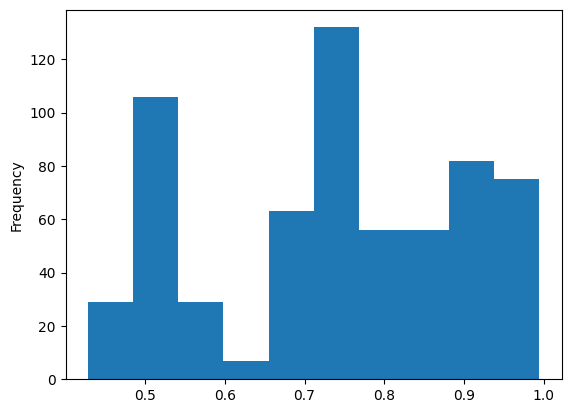

In [40]:
tabela_resultados['Prob. Max.'].plot(kind='hist')

In [41]:
# Filtro para prob. > 0.75
tabela_resultados['Prob. Max.'] > 0.75

,Prob. Max.
0,True
1,False
2,False
3,True
4,False
...,...
630,True
631,False
632,False
633,False


In [42]:
filtro_confianca = tabela_resultados['Prob. Max.'] > 0.75
novo_x_treino = pd.concat([x_treino, dados_sem_rotulo_normalizados[filtro_confianca]])
novo_y_treino = pd.concat([pd.Series(y_treino), tabela_resultados.loc[filtro_confianca, 'Previsao']])

In [43]:
svm = SVC(kernel='linear', probability=True, random_state=10)
svm.fit(novo_x_treino, novo_y_treino)

SVC(kernel='linear', probability=True, random_state=10)

In [44]:
novo_y_previsto = svm.predict(x_teste)
resultados_self_training1 = classification_report(y_teste, novo_y_previsto)

com 1 no final pois estamos realizando uma etapa de self-training, utilizando o modelo supervisionado e fazendo a previsão para os dados que não possuem rótulos e pegando os melhores resultados de confiança.

Estamos fazendo isso apenas uma vez, então parte dos dados ainda não foram utilizados. Vamos armazenar nessa variável, self_train_1, igual a

In [45]:
print('SVM Supervisionado')
print(resultados_svm)
print('-'*50)
print('SVM Self Training 1º estágio')
print(resultados_self_training1)

SVM Supervisionado
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.67      0.91      0.77        46
           2       0.90      0.76      0.82        37

    accuracy                           0.75       106
   macro avg       0.77      0.69      0.70       106
weighted avg       0.77      0.75      0.73       106

--------------------------------------------------
SVM Self Training 1º estágio
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.72      0.91      0.81        46
           2       0.92      0.89      0.90        37

    accuracy                           0.79       106
   macro avg       0.80      0.73      0.74       106
weighted avg       0.80      0.79      0.78       106



In [46]:
# Modelo se deu melhor com a escolha de dados com maior confiança.

Vamos utilizar o modelo de self-training da biblioteca Scikit-Learn , que realiza esse processo de forma automática.

Portanto, ao invés de criar um modelo após o outro, utilizando os dados de maior confiança de acordo com o modelo anterior, vamos utilizar o algoritmo da biblioteca Scikit-Learn que já faz esse processo iterativo de forma automática.

Ele gera um modelo a partir dos dados rotulados, faz a previsão dos dados que não possuem rótulo, pega os dados com maior confiança de acordo com a probabilidade, acrescenta e cria um novo modelo. Depois, repete o processo para os dados que não têm rótulo, que ainda estão com rótulo faltante, para gerar cada vez um modelo mais aprimorado.

In [47]:
from sklearn.semi_supervised import SelfTrainingClassifier

In [48]:
pd.Series([-1]*dados_sem_rotulo_normalizados.shape[0])

,0
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
630,-1
631,-1
632,-1
633,-1


In [50]:
x_treino_self_training = pd.concat([x_treino,
                                    dados_sem_rotulos],
                                   ignore_index=True)

y_treino_self_training = pd.concat([pd.Series(y_treino),
                                    pd.Series([-1]*dados_sem_rotulo_normalizados.shape[0])],
                                   ignore_index=True)

In [51]:
x_treino_self_training

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
0,0.584615,0.017857,1.0,0.0,1.0,0.0,0.400000
1,0.538462,0.035714,0.0,0.0,0.0,0.0,0.466667
2,0.538462,0.017857,1.0,0.0,1.0,0.0,0.400000
3,0.569231,0.071429,1.0,0.0,1.0,0.0,1.000000
4,0.553846,0.196429,0.0,1.0,1.0,1.0,0.666667
...,...,...,...,...,...,...,...
948,8.100000,66.000000,1.0,0.0,1.0,1.0,255.000000
949,6.700000,45.000000,1.0,1.0,0.0,0.0,247.000000
950,6.700000,38.000000,1.0,0.0,1.0,0.0,255.000000
951,3.000000,40.000000,1.0,1.0,1.0,1.0,255.000000


In [52]:
y_treino_self_training

,0
0,2
1,2
2,2
3,0
4,0
...,...
948,-1
949,-1
950,-1
951,-1


In [59]:
svm = SVC(kernel='linear', probability=True, random_state=10)
self_training = SelfTrainingClassifier(svm, threshold=0.80, max_iter=15, verbose=True)

In [60]:
self_training.fit(x_treino_self_training, y_treino_self_training)

End of iteration 1, added 599 new labels.


SelfTrainingClassifier(estimator=SVC(kernel='linear', probability=True,
                                     random_state=10),
                       max_iter=15, threshold=0.8, verbose=True)

In [61]:
y_previsto = self_training.predict(x_teste)

In [62]:
resultados_self_training = classification_report(y_teste, y_previsto)

In [63]:
print('SVM Supervisionado')
print(resultados_svm)
print('-'*50)
print('SVM Self Training 1º estágio')
print(resultados_self_training1)
print('-'*50)
print('SVM Self Training')
print(resultados_self_training)

SVM Supervisionado
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.67      0.91      0.77        46
           2       0.90      0.76      0.82        37

    accuracy                           0.75       106
   macro avg       0.77      0.69      0.70       106
weighted avg       0.77      0.75      0.73       106

--------------------------------------------------
SVM Self Training 1º estágio
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.72      0.91      0.81        46
           2       0.92      0.89      0.90        37

    accuracy                           0.79       106
   macro avg       0.80      0.73      0.74       106
weighted avg       0.80      0.79      0.78       106

--------------------------------------------------
SVM Self Training
              precision    recall  f1-score   support

           0   

In [64]:
from sklearn.semi_supervised import LabelPropagation

In [65]:
label_propagation = LabelPropagation()

In [66]:
label_propagation.fit(x_treino_self_training, y_treino_self_training)

LabelPropagation()

In [70]:
y_previsto = label_propagation.predict(x_teste)
resultados_label_propagation = classification_report(y_teste, y_previsto)

In [71]:
print('-'*50)
print('SVM Self Training')
print(resultados_self_training)
print('-'*50)
print('Label Propagation')
print(resultados_label_propagation)

--------------------------------------------------
SVM Self Training
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.67      0.91      0.77        46
           2       0.90      0.76      0.82        37

    accuracy                           0.75       106
   macro avg       0.77      0.69      0.70       106
weighted avg       0.77      0.75      0.73       106

--------------------------------------------------
Label Propagation
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.93      0.97        46
           2       0.92      0.95      0.93        37

    accuracy                           0.95       106
   macro avg       0.95      0.96      0.95       106
weighted avg       0.96      0.95      0.95       106



In [72]:
import pickle

In [73]:
with open ('min_max_scaler.pkl', 'wb') as arquivo:
  pickle.dump(scaler, arquivo)

In [75]:
with open ('modelo_label_propagation.pkl', 'wb') as arquivo:
  pickle.dump(label_propagation, arquivo)

In [76]:
modelo_min_max = pd.read_pickle('/content/min_max_scaler.pkl')
modelo_label_propagation = pd.read_pickle('/content/modelo_label_propagation.pkl')

In [77]:
novo_dado = {
    'pH':[6.4],
    'Temperatura':[52],
    'Sabor':[0],
    'Odor':[1],
    'Gordura':[1],
    'Turbidez':[0],
    'Cor':[253]
}

In [79]:
novo = pd.DataFrame(novo_dado)
novo

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
0,6.4,52,0,1,1,0,253


In [80]:
novo = modelo_min_max.transform(novo)
modelo_label_propagation.predict(novo)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LabelPropagation was fitted with feature names
  warnings.warn(


array([0])

In [81]:
label_encoder.inverse_transform([0])

array(['alta'], dtype=object)